# **Chess Games Analysis with Three Python Libraries**

This dataset contains data for every rated Lichess game played between January 2013 and December 2014. There were approximately 15,000,000 games in total. It includes the players' names, ratings, the winner, the opening, the number of moves, etc. We will conduct an analysis to gain insights on the games and address our research questions. We hope to discover interesting patterns by analysing the various characteristics of each game, including the type of opening employed, the ratings of the players, and more. This data analysis allows us to comprehend the effects of various moves, strategies, and time controls on game outcomes. This research will also compare the performance of three Python libraries: Pandas, Vaex, and Koalas.

### Libraries
1. Pandas
2. Vaex
3. Koalas

###Group Members: 

<table>
  <tr>
    <th>Name</th>
    <th>Matric No</th>
  </tr>
  <tr>
    <th>Eddie Wong Chung Pheng </th>
    <th>A20EC0031</th>
  </tr>
  <tr>
    <th>Madihah Binti Che Zabri </th>
    <th>A20EC0074</th>
  </tr>
  <tr>
    <th>Nurarissa Dayana Binti Mohd Sukri</th>
    <th>A20EC0120</th>
  </tr>
  <tr> 
    <th>Vincent Boo Ee Khai</th>
    <th>A20EC0231</th>
  </tr>
</table>
<br></br>

###About The Dataset

*  This dataset contains data from all rated games played in Lichess from January 2013 to December 2014, in total there are around 15,000,000 games.
*  The dataset consists of 14918230 rows and 16 columns.
*  The size of this dataset is 1.99GB.
*  The dataset can be obtained from [here](https://www.kaggle.com/datasets/maca11/chess-games-from-lichess-20132014?select=Lichess_2013_2014_Complete.csv)


## Downloading the Dataset

Install Pydrive to read dataset from Google Drive. Dataset is uploaded in Google Drive and the link is provided to mount the dataset.

In [1]:
# Read dataset from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/10CIeiPoyqyyDT_4C2B0eGANY-XVFpzkr/view?usp=share_link'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Lichess_2013_2014_Complete.csv') 

The dataset has been downloaded and extracted. We will compare the performance of libraries in analyzing the data.

##Import The Libraries

In [ ]:
!pip install vaex

In [ ]:
!pip install koalas

In [ ]:
!pip install pyspark

In [ ]:
!pip install -U kaleido

In [7]:
import pandas as pd
import numpy as np
import vaex as vx
import vaex.ml
import vaex.viz as vv
import pyspark.pandas as ps
import databricks.koalas as ks
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preparation and Cleaning




###Read the data
We will evaluate which library reads large datasets more efficiently.

**Pandas**


In [8]:
%%time 
pdf = pd.read_csv("Lichess_2013_2014_Complete.csv")
pd.set_option('display.max_columns', None)

CPU times: user 38.1 s, sys: 4.66 s, total: 42.8 s
Wall time: 55.4 s


**Vaex**

In [9]:
%%time
vdf = vx.open('Lichess_2013_2014_Complete.csv') 

CPU times: user 1.85 s, sys: 821 ms, total: 2.67 s
Wall time: 6.07 s


**Koalas**

In [10]:
%%time
kdf = ks.read_csv('Lichess_2013_2014_Complete.csv')

CPU times: user 457 ms, sys: 243 ms, total: 700 ms
Wall time: 1min 10s


### Viewing The Dataset

**Pandas**


In [11]:
%%time
pdf.head()

CPU times: user 604 µs, sys: 70 µs, total: 674 µs
Wall time: 3.18 ms


,WhiteElo,BlackElo,WhiteName,BlackName,Winner,Termination,Site,Day,Month,Year,InitialTime,Increment,TimeControl,Opening,ECO,Number_of_Moves
0,1639,1403,BFG9k,mamalak,White,Normal,https://lichess.org/j1dkb5dw,31,12,2012,600,8,Rapid,French Defense: Normal Variation,C00,13
1,1654,1919,Desmond_Wilson,savinka59,White,Normal,https://lichess.org/a9tcp02g,31,12,2012,480,2,Rapid,"Queen's Pawn Game: Colle System, Anti-Colle",D04,18
2,1643,1747,Kozakmamay007,VanillaShamanilla,White,Normal,https://lichess.org/szom2tog,31,12,2012,420,17,Rapid,Four Knights Game: Italian Variation,C50,11
3,1824,1973,Naitero_Nagasaki,800,Black,Normal,https://lichess.org/rklpc7mk,31,12,2012,60,1,Bullet,Caro-Kann Defense: Goldman Variation,B12,47
4,1765,1815,nichiren1967,Naitero_Nagasaki,Black,Normal,https://lichess.org/1xb3os63,31,12,2012,60,1,Bullet,French Defense: La Bourdonnais Variation,C00,23


**Vaex**

In [12]:
%%time
vdf.head(5)

CPU times: user 1.38 ms, sys: 80 µs, total: 1.46 ms
Wall time: 2.98 ms


#,WhiteElo,BlackElo,WhiteName,BlackName,Winner,Termination,Site,Day,Month,Year,InitialTime,Increment,TimeControl,Opening,ECO,Number_of_Moves
0,1639,1403,BFG9k,mamalak,White,Normal,https://lichess.org/j1dkb5dw,31,12,2012,600,8,Rapid,French Defense: Normal Variation,C00,13
1,1654,1919,Desmond_Wilson,savinka59,White,Normal,https://lichess.org/a9tcp02g,31,12,2012,480,2,Rapid,"Queen's Pawn Game: Colle System, Anti-Colle",D04,18
2,1643,1747,Kozakmamay007,VanillaShamanilla,White,Normal,https://lichess.org/szom2tog,31,12,2012,420,17,Rapid,Four Knights Game: Italian Variation,C50,11
3,1824,1973,Naitero_Nagasaki,800,Black,Normal,https://lichess.org/rklpc7mk,31,12,2012,60,1,Bullet,Caro-Kann Defense: Goldman Variation,B12,47
4,1765,1815,nichiren1967,Naitero_Nagasaki,Black,Normal,https://lichess.org/1xb3os63,31,12,2012,60,1,Bullet,French Defense: La Bourdonnais Variation,C00,23


**Koalas**

In [13]:
%%time 
kdf.head()

CPU times: user 45.6 ms, sys: 9.93 ms, total: 55.6 ms
Wall time: 407 ms


,WhiteElo,BlackElo,WhiteName,BlackName,Winner,Termination,Site,Day,Month,Year,InitialTime,Increment,TimeControl,Opening,ECO,Number_of_Moves
0,1639,1403,BFG9k,mamalak,White,Normal,https://lichess.org/j1dkb5dw,31,12,2012,600,8,Rapid,French Defense: Normal Variation,C00,13
1,1654,1919,Desmond_Wilson,savinka59,White,Normal,https://lichess.org/a9tcp02g,31,12,2012,480,2,Rapid,"Queen's Pawn Game: Colle System, Anti-Colle",D04,18
2,1643,1747,Kozakmamay007,VanillaShamanilla,White,Normal,https://lichess.org/szom2tog,31,12,2012,420,17,Rapid,Four Knights Game: Italian Variation,C50,11
3,1824,1973,Naitero_Nagasaki,800,Black,Normal,https://lichess.org/rklpc7mk,31,12,2012,60,1,Bullet,Caro-Kann Defense: Goldman Variation,B12,47
4,1765,1815,nichiren1967,Naitero_Nagasaki,Black,Normal,https://lichess.org/1xb3os63,31,12,2012,60,1,Bullet,French Defense: La Bourdonnais Variation,C00,23


### Handle Missing Values

**Pandas**


In [14]:
%%time
pdf.isnull().sum()

CPU times: user 10.2 s, sys: 582 ms, total: 10.8 s
Wall time: 16.3 s


WhiteElo           0
BlackElo           0
WhiteName          0
BlackName          0
Winner             0
Termination        0
Site               0
Day                0
Month              0
Year               0
InitialTime        0
Increment          0
TimeControl        0
Opening            0
ECO                0
Number_of_Moves    0
dtype: int64

**Vaex**

In [15]:
%%time
print("WhiteElo\t", vdf.WhiteElo.isnan().sum())
print("BlackElo\t", vdf.BlackElo.isnan().sum())
print("WhiteName\t", vdf.WhiteName.isnan().sum())
print("BlackName\t", vdf.BlackName.isnan().sum())
print("Termination\t", vdf.Termination.isnan().sum())
print("Site\t\t", vdf.Site.isnan().sum())
print("Day\t\t", vdf.Day.isnan().sum())
print("Month\t\t", vdf.Month.isnan().sum())
print("Year\t\t", vdf.Year.isnan().sum())
print("InitialTime\t", vdf.InitialTime.isnan().sum())
print("Increment\t", vdf.Increment.isnan().sum())
print("TimeControl\t", vdf.TimeControl.isnan().sum())
print("Opening\t\t", vdf.Opening.isnan().sum())
print("ECO\t\t", vdf.ECO.isnan().sum())
print("Number_of_Moves\t", vdf.Number_of_Moves.isnan().sum())

WhiteElo	 0
BlackElo	 0
WhiteName	 0
BlackName	 0
Termination	 0
Site		 0
Day		 0
Month		 0
Year		 0
InitialTime	 0
Increment	 0
TimeControl	 0
Opening		 0
ECO		 0
Number_of_Moves	 0
CPU times: user 2min 24s, sys: 15.2 s, total: 2min 39s
Wall time: 1min 27s


**Koalas**

In [16]:
%%time
kdf.isnull().sum()

CPU times: user 615 ms, sys: 93 ms, total: 708 ms
Wall time: 49.7 s


WhiteElo           0
BlackElo           0
WhiteName          0
BlackName          0
Winner             0
Termination        0
Site               0
Day                0
Month              0
Year               0
InitialTime        0
Increment          0
TimeControl        0
Opening            0
ECO                0
Number_of_Moves    0
dtype: int64

### Drop Unnecessary Columns 

We will not be using the opening songs and volume, and the day of the gameplay for this study.

**Pandas**


In [17]:
%%time
pdf = pdf.drop(["Day", "Opening", "ECO"], axis=1)

CPU times: user 1.32 s, sys: 518 ms, total: 1.84 s
Wall time: 1.84 s


**Vaex**

In [18]:
%%time
vdf = vdf.drop(columns=["Day", "Opening", "ECO"])

CPU times: user 1.49 ms, sys: 0 ns, total: 1.49 ms
Wall time: 1.43 ms


**Koalas**

In [19]:
%%time
kdf = kdf.drop(columns=["Day", "Opening", "ECO"])

CPU times: user 39.4 ms, sys: 6.49 ms, total: 45.9 ms
Wall time: 193 ms


###Sorting The Dataset
The dataset is sorted by 2014 in order to view the most recent game play.

**Pandas**


In [20]:
%%time
pdf.sort_values(by='Year', ascending=False).head()

CPU times: user 4.07 s, sys: 2.79 s, total: 6.86 s
Wall time: 6.87 s


,WhiteElo,BlackElo,WhiteName,BlackName,Winner,Termination,Site,Month,Year,InitialTime,Increment,TimeControl,Number_of_Moves
7459115,1905,1863,Alia,rafiquito,Black,Normal,https://lichess.org/ZSsxYwgy,6,2014,420,8,Rapid,33
9945506,1575,1545,veridik,STANISLAV2,White,Normal,https://lichess.org/3RcUeAl5,8,2014,300,2,Blitz,26
9945480,1671,1541,ISHOGAI,audax1,Black,Normal,https://lichess.org/EbdTeNEf,8,2014,180,0,Blitz,28
9945481,1400,1489,Triceratops_2007,Breaksparov,Black,Normal,https://lichess.org/IUyf7e0g,8,2014,120,6,Blitz,25
9945482,1619,1553,Andrew67,rosebud-,White,Normal,https://lichess.org/0tyCcZXw,8,2014,600,10,Rapid,33


**Vaex**

In [21]:
%%time
vdf.sort(by='Year', ascending=False).head(5)

CPU times: user 10.2 s, sys: 1.58 s, total: 11.7 s
Wall time: 9.6 s


#,WhiteElo,BlackElo,WhiteName,BlackName,Winner,Termination,Site,Month,Year,InitialTime,Increment,TimeControl,Number_of_Moves
0,1433,1438,Dolg,ArchisT,White,Normal,https://lichess.org/9s3drbbn,1,2014,600,0,Rapid,21
1,1560,1652,NapoleonII,SteMitch,White,Time forfeit,https://lichess.org/81um1man,1,2014,600,0,Rapid,22
2,1532,1160,juansosaipanaque,zaza71,White,Time forfeit,https://lichess.org/lnpqqokc,1,2014,120,0,Bullet,29
3,1806,1914,draten,perico12,White,Normal,https://lichess.org/nga51dld,1,2014,300,0,Blitz,24
4,1500,1460,firespoon,yesse2,White,Time forfeit,https://lichess.org/me4jnzdp,1,2014,180,0,Blitz,30


**Koalas**

In [22]:
%%time
kdf.sort_values(by='Year', ascending=False).head()

CPU times: user 59.7 ms, sys: 3.5 ms, total: 63.2 ms
Wall time: 330 ms


,WhiteElo,BlackElo,WhiteName,BlackName,Winner,Termination,Site,Month,Year,InitialTime,Increment,TimeControl,Number_of_Moves
3375674,1433,1438,Dolg,ArchisT,White,Normal,https://lichess.org/9s3drbbn,1,2014,600,0,Rapid,21
3375677,1560,1652,NapoleonII,SteMitch,White,Time forfeit,https://lichess.org/81um1man,1,2014,600,0,Rapid,22
3375681,1532,1160,juansosaipanaque,zaza71,White,Time forfeit,https://lichess.org/lnpqqokc,1,2014,120,0,Bullet,29
3375682,1806,1914,draten,perico12,White,Normal,https://lichess.org/nga51dld,1,2014,300,0,Blitz,24
3375683,1500,1460,firespoon,yesse2,White,Time forfeit,https://lichess.org/me4jnzdp,1,2014,180,0,Blitz,30


## Exploratory Analysis and Visualization

In this section, we will examine the data characteristics, including the mean number of moves, the distribution of the month in which the game was played, the highest and lowest rated players, and the correlation between the attributes.

**The Number of Moves Mean** - The average value of moves across all chess games.

**Pandas**


In [ ]:
%%time
pdf['Number_of_Moves'].mean()

CPU times: user 38.6 ms, sys: 1.08 ms, total: 39.7 ms
Wall time: 46.7 ms


33.846118205712074

**Vaex**

In [ ]:
%%time
vdf['Number_of_Moves'].mean()

CPU times: user 9.65 s, sys: 1.87 s, total: 11.5 s
Wall time: 19.6 s


array(33.84611821)

**Koalas**

In [ ]:
%%time
kdf['Number_of_Moves'].mean()

CPU times: user 212 ms, sys: 23 ms, total: 235 ms
Wall time: 26.5 s


33.846118205712074



---


**Chess Game Month Distribution** - The monthly distribution of chess matches.

**Pandas**


CPU times: user 1.27 s, sys: 127 ms, total: 1.39 s
Wall time: 1.39 s


<AxesSubplot: ylabel='Frequency'>

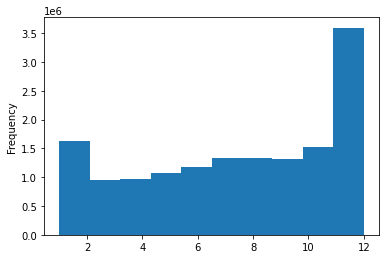

In [ ]:
%%time
pdf['Month'].plot.hist()

**Vaex**

/usr/local/lib/python3.8/dist-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


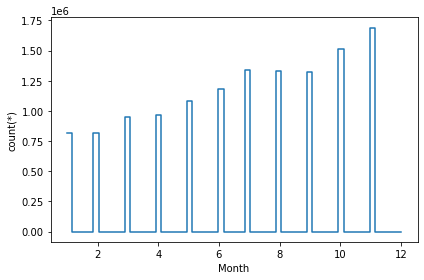

In [ ]:
%%time
vdf.plot1d(vdf.Month)

**Koalas**

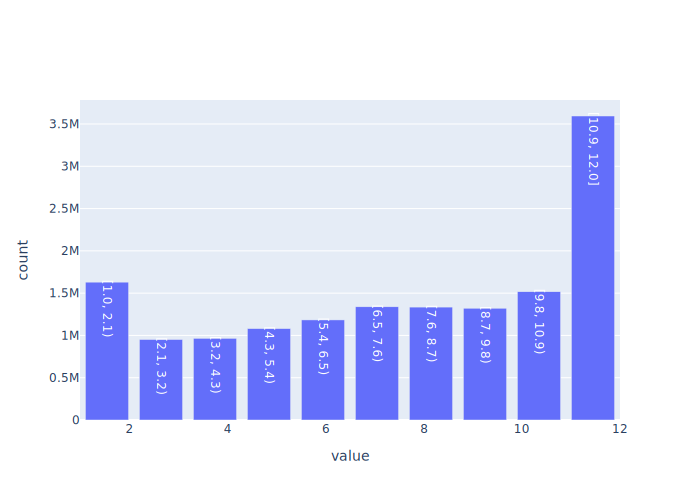

CPU times: user 502 ms, sys: 186 ms, total: 688 ms
Wall time: 58.4 s


In [25]:
%%time
fig = kdf['Month'].plot.hist()
fig.show("svg", engine="kaleido")



---


**Highest Elo rating** - The Elo rating system is a method for determining the relative skill levels of players in zero-sum games like chess. Having Elo higher than 2000 is consider an advanced player.

**Pandas**


In [ ]:
%%time
pdf[['WhiteElo','BlackElo']].max()

CPU times: user 110 ms, sys: 0 ns, total: 110 ms
Wall time: 115 ms


WhiteElo    2970
BlackElo    2970
dtype: int64

**Vaex**

In [ ]:
%%time
print("WhiteElo",vdf['WhiteElo'].max())
print("BlackElo",vdf['BlackElo'].max())

WhiteElo 2970
BlackELo 2970
CPU times: user 18.2 s, sys: 4.8 s, total: 23 s
Wall time: 22.4 s


**Koalas**

In [ ]:
%%time
kdf[['WhiteElo','BlackElo']].max()

CPU times: user 263 ms, sys: 33.3 ms, total: 297 ms
Wall time: 29.8 s


WhiteElo    2970
BlackElo    2970
dtype: int32



---


**Lowest ELO rating** - The Elo rating system is a method for determining the relative skill levels of players in zero-sum games like chess. Elo lower than 1000 is considered a beginner.

**Pandas**


In [ ]:
%%time
pdf[['WhiteElo','BlackElo']].min()

CPU times: user 149 ms, sys: 44.8 ms, total: 194 ms
Wall time: 292 ms


WhiteElo    511
BlackElo    704
dtype: int64

**Vaex**

In [ ]:
%%time
print("WhiteElo",vdf['WhiteElo'].min())
print("BlackElo",vdf['BlackElo'].min())

WhiteElo 511
BlackElo 704
CPU times: user 18.8 s, sys: 917 ms, total: 19.7 s
Wall time: 11.4 s


**Koalas**

In [ ]:
%%time
kdf[['WhiteElo','BlackElo']].min()

CPU times: user 385 ms, sys: 40.8 ms, total: 426 ms
Wall time: 27.2 s


WhiteElo    511
BlackElo    704
dtype: int32



---


**Correlation** - Using correlation, we can analyse the data to determine if there is a relationship between its variables.

**Pandas**


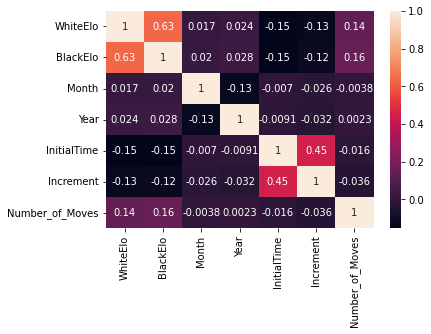

In [ ]:
%%time
sns.heatmap(pdf.corr(), annot = True)
sns.set(rc={'figure.figsize':(15, 15)})

**Vaex**

In [ ]:
%%time
vdf.correlation(x=['WhiteElo'], y=['WhiteElo','BlackElo', 'Month', 'Year', 'InitialTime', 'Increment', 'Number_of_Moves'])

CPU times: user 17.2 s, sys: 840 ms, total: 18 s
Wall time: 9.5 s


array([[ 1.        ,  0.63076933,  0.01677337,  0.0237081 , -0.15292352,
        -0.12694023,  0.14001812]])

**Koalas**

In [ ]:
%%time
kdf.corr()

CPU times: user 828 ms, sys: 78.7 ms, total: 907 ms
Wall time: 2min 5s


,WhiteElo,BlackElo,Month,Year,InitialTime,Increment,Number_of_Moves
WhiteElo,1.000000,0.630769,0.016773,0.023708,-0.152924,-0.126940,0.140018
BlackElo,0.630769,1.000000,0.020254,0.028343,-0.152487,-0.124079,0.157436
Month,0.016773,0.020254,1.000000,-0.126758,-0.007037,-0.026483,-0.003796
Year,0.023708,0.028343,-0.126758,1.000000,-0.009142,-0.032140,0.002334
InitialTime,-0.152924,-0.152487,-0.007037,-0.009142,1.000000,0.450276,-0.016472
Increment,-0.126940,-0.124079,-0.026483,-0.032140,0.450276,1.000000,-0.036216
Number_of_Moves,0.140018,0.157436,-0.003796,0.002334,-0.016472,-0.036216,1.000000


## Asking and Answering Questions



#### Q1: Which chess color have more wins?

Answer: White color has more wins.

>The library function description:
* Pandas: Groupby data aggregation
* Vaex: Groupby data aggregation
* Koalas: Groupby data aggregation
* Plotly: Histogram
* Matplotlib: Bar Graph

**Pandas**


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 10.7 µs


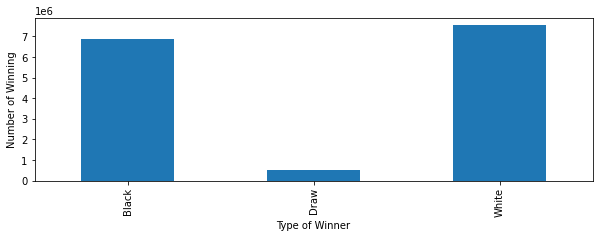

In [ ]:
%time
winpdf = pdf['Winner'].groupby(pdf['Winner']).count()

fig, ax = plt.subplots(figsize=(10,3))
winpdf.plot.bar(xlabel='Type of Winner', ylabel='Number of Winning')

**Vaex**

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 12.4 µs


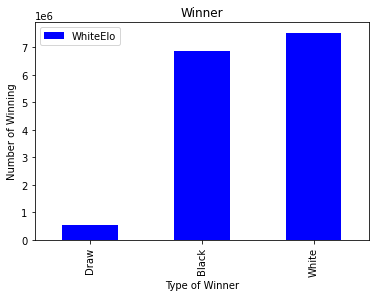

In [ ]:
%time 
v = vdf.groupby('Winner').agg({'WhiteElo':'count'})
v = v.to_pandas_df()
v.plot.bar(x='Winner', y='WhiteElo', color='blue')
plt.title("Winner")
plt.ylabel('Number of Winning')
plt.xlabel('Type of Winner')
plt.show()

**Koalas**

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.78 µs


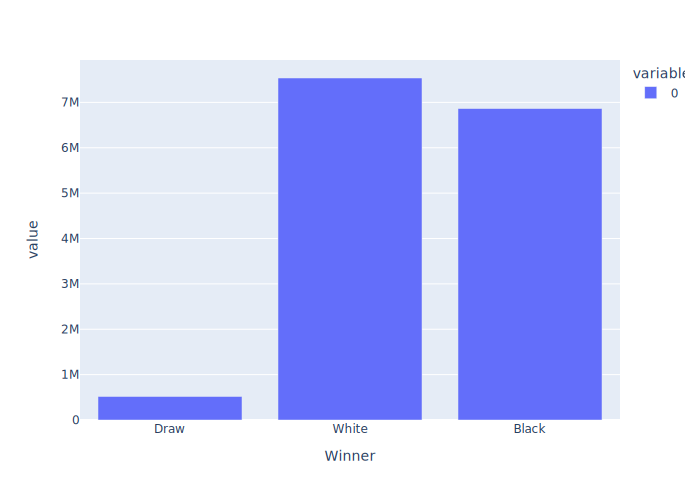

In [26]:
%time 
k = kdf.groupby('Winner').size()
fig2 = k.plot(kind='bar')
fig2.show("svg", engine="kaleido")

#### Q2: Who is the player that has the most game?

Answer: Player ribarisah has the most game with a total of 45907.

>The library function description:
* Pandas: Data aggregation
* Vaex: Data aggregation
* Koalas: Data aggregation

**Pandas**


In [27]:
%%time
total_gamesP = pdf['WhiteName'].value_counts().add(pdf['BlackName'].value_counts(), fill_value=0)
total_gamesP = total_gamesP.sort_values(ascending = False)
total_gamesP.head(1)

CPU times: user 9.76 s, sys: 212 ms, total: 9.97 s
Wall time: 11.8 s


ribarisah    45907.0
dtype: float64

**Vaex**

In [28]:
%%time
total_gamesP = vdf['WhiteName'].value_counts().add(vdf['BlackName'].value_counts(), fill_value=0)
total_gamesP = total_gamesP.sort_values(ascending = False)
total_gamesP.head(1)

CPU times: user 28.8 s, sys: 4.75 s, total: 33.6 s
Wall time: 23 s


ribarisah    45907.0
dtype: float64

**Koalas**

In [30]:
%%time
ks.set_option('compute.ops_on_diff_frames', True)
total_gamesP = kdf['WhiteName'].value_counts().add(kdf['BlackName'].value_counts())
total_gamesP = total_gamesP.sort_values(ascending = False)
total_gamesP.head(1)

CPU times: user 241 ms, sys: 21 ms, total: 262 ms
Wall time: 2.15 s


ribarisah    45907
dtype: int64

#### Q3: How many games ended normally based on the TimeControl?

Answer: 4204736, 1871279, 261979, 3628779 games ended normally for Blitz, Bullet, Classical, and Rapid time control respectively.

>The library function description:
* Pandas: Groupby data aggregation
* Vaex: Groupby data aggregation
* Koalas: Groupby data aggregation

**Pandas**


In [ ]:
%%time
newpdf = pdf[pdf.Termination == 'Normal']
newpdf[['Termination','TimeControl']].groupby('TimeControl').count()

CPU times: user 4.26 s, sys: 76.2 ms, total: 4.34 s
Wall time: 4.69 s


,Termination
TimeControl,
Blitz,4204736
Bullet,1871279
Classical,261979
Rapid,3628779


**Vaex**

In [ ]:
%%time
newvdf = vdf[vdf.Termination == 'Normal']
newvdf[['Termination','TimeControl']].groupby('TimeControl', agg='count')

CPU times: user 23.1 s, sys: 1.92 s, total: 25.1 s
Wall time: 16.5 s


#,TimeControl,count
0,Rapid,3628779
1,Classical,261979
2,Blitz,4204736
3,Bullet,1871279


**Koalas**

In [ ]:
%%time
newkdf = kdf[kdf.Termination == 'Normal']
newkdf[['Termination','TimeControl']].groupby('TimeControl').count()

CPU times: user 66.2 ms, sys: 10.4 ms, total: 76.6 ms
Wall time: 374 ms


,Termination
TimeControl,
Bullet,1871279
Blitz,4204736
Classical,261979
Rapid,3628779


#### Q4: Which game did the lower-rated player win against a higher-rated opponent whose elo difference was the greatest?

Answer: Site https://lichess.org/o9DnmkC1 is the game where a low-rated player win against high-rated player with an Elo rating difference of 1331.   

>The library function description:
* Pandas: absolute value, idxmax(), loc for accessing multiple columns
* Vaex: absolute and max value
* Koalas: absolute value, idxmax(), loc for accessing multiple columns

**Pandas**


In [31]:
%time
new_pdf = pdf[((pdf['WhiteElo']-pdf['BlackElo']>=400)&(pdf['Winner'] == 'Black'))|((pdf['WhiteElo']-pdf['BlackElo']<=-400)&(pdf['Winner'] == 'White'))][['WhiteElo','BlackElo','Site']]
new_pdf['Difference'] = (new_pdf['WhiteElo']-new_pdf['BlackElo']).abs()
new_pdf[['Difference','Site']].loc[new_pdf['Difference'].idxmax()]

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 18.6 µs


Difference                            1331
Site          https://lichess.org/o9DnmkC1
Name: 5086669, dtype: object

**Vaex**

In [32]:
%time
new_vdf = vdf[((vdf['WhiteElo']-vdf['BlackElo']>=400)&(vdf['Winner'] == 'Black'))|((vdf['WhiteElo']-vdf['BlackElo']<=-400)&(vdf['Winner'] == 'White'))][['WhiteElo','BlackElo','Site']]
new_vdf['Difference'] = (new_vdf['WhiteElo']-new_vdf['BlackElo']).abs()
new_vdf[['Difference','Site']].max('Difference')

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 10.5 µs


array(1331)

**Koalas**

In [35]:
%time
new_kdf = kdf[((kdf['WhiteElo']-kdf['BlackElo']>=400)&(kdf['Winner'] == 'Black'))|((kdf['WhiteElo']-kdf['BlackElo']<=-400)&(kdf['Winner'] == 'White'))][['WhiteElo','BlackElo','Site']]
new_kdf['Difference'] = (new_kdf['WhiteElo']-new_kdf['BlackElo']).abs()
new_kdf[['Difference','Site']].loc[new_kdf['Difference'].idxmax()]

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 14.1 µs


Difference                            1331
Site          https://lichess.org/o9DnmkC1
Name: 5086669, dtype: object

#### Q5: In what time control is it easiest to defeat a higher-rated opponent?

Answer: Classical time control shows a high probability to win against a higher-rated opponent.

>The library function description:
* Pandas: Groupby data aggregation
* Vaex: Groupby data aggregation
* Koalas: Groupby data aggregation

**Pandas**


In [ ]:
%%time
games_p = pdf[(pdf['WhiteElo']-pdf['BlackElo']>=400)|(pdf['WhiteElo']-pdf['BlackElo']<=-400)].groupby('TimeControl')['TimeControl'].value_counts()
win_p = pdf[((pdf['WhiteElo']-pdf['BlackElo']>=400)&(pdf['Winner'] == 'Black'))|((pdf['WhiteElo']-pdf['BlackElo']<=-400)&(pdf['Winner'] == 'White'))].groupby('TimeControl')['TimeControl'].value_counts()

win_p/games_p*100

CPU times: user 68.5 ms, sys: 2.76 ms, total: 71.2 ms
Wall time: 90.6 ms


TimeControl  TimeControl
Blitz        Blitz           9.321121
Bullet       Bullet          8.248378
Classical    Classical       7.843137
Rapid        Rapid          10.747051
Name: TimeControl, dtype: float64

**Vaex**

In [ ]:
%%time
games_v = vdf[(vdf['WhiteElo']-vdf['BlackElo']>=400)|(vdf['WhiteElo']-vdf['BlackElo']<=-400)].groupby('TimeControl', agg='count')
win_v = vdf[((vdf['WhiteElo']-vdf['BlackElo']>=400)&(vdf['Winner'] == 'Black'))|((vdf['WhiteElo']-vdf['BlackElo']<=-400)&(vdf['Winner'] == 'White'))].groupby('TimeControl', agg='count')

(win_v.values/games_v.values)*100

CPU times: user 48.2 s, sys: 8.68 s, total: 56.9 s
Wall time: 42.5 s


array([[10.59998908],
       [10.71677799],
       [ 8.86824405],
       [ 7.83676869]])

**Koalas**

In [ ]:
%%time
games_k = kdf[(kdf['WhiteElo']-kdf['BlackElo']>=400)|(kdf['WhiteElo']-kdf['BlackElo']<=-400)].groupby('TimeControl')['TimeControl'].value_counts()
win_k = kdf[((kdf['WhiteElo']-kdf['BlackElo']>=400)&(kdf['Winner'] == 'Black'))|((kdf['WhiteElo']-kdf['BlackElo']<=-400)&(kdf['Winner'] == 'White'))].groupby('TimeControl')['TimeControl'].value_counts()

win_k/games_k*100

CPU times: user 433 ms, sys: 52.6 ms, total: 485 ms
Wall time: 3.09 s


TimeControl  TimeControl
Blitz        Blitz           8.868244
Bullet       Bullet          7.836769
Classical    Classical      10.716778
Rapid        Rapid          10.599989
Name: TimeControl, dtype: float64

## Inferences and Conclusion

In conclusion, this study aimed to understand patterns and trends in the game of chess through Exploratory Data Analysis. Using a dataset of games from 2013 to 2014, we performed a comprehensive analysis of player ratings, game outcomes, and move sequences. Our findings showed that player ratings have a strong impact on game outcomes, with higher rated players having a higher win rate. We also observed that certain moves and openings are more frequent in higher rated games, indicating that certain strategies may be more effective at higher levels of play.

The results of this study have important implications for the future of chess analysis and can be used to inform the development of new training and evaluation tools. However, it is important to note that the results are limited by the time period and quality of the data, and future studies could benefit from incorporating more recent and comprehensive data. Additionally, our analysis was limited to a relatively small number of variables, and future studies could benefit from exploring other aspects of the game, such as player behavior, time management, and psychological factors.

## References and Future Work

Overall, this project highlights the value of Exploratory Data Analysis in the analysis of complex systems, and the potential for data to inform our understanding of the game of chess. The results of this study lay the foundation for future research aimed at improving the quality and effectiveness of chess analysis.

[Vaex Tutorial](https://vaex.io/docs/tutorials.html) <br/>
[Koalas](https://koalas.readthedocs.io/en/latest/) <br/>
[Vaex Visualization](https://vaex.readthedocs.io/en/latest/_modules/vaex/viz.html) <br/>
[Vaex PyPI](https://pypi.org/project/vaex/ps) <br/>
[Hands-On Guide to Vaex](https://analyticsindiamag.com/hands-on-guide-to-vaex-tool-to-overcome-drawbacks-of-pandas/) <br/>
[Introduction to Vaex in Python](https://www.geeksforgeeks.org/introduction-to-vaex-in-python/)